## 信号与傅里叶变换

[FFT的物理意义](https://www.cnblogs.com/minks/p/5676770.html)

[STM32F407的DSP教程: FFT变换结果的物理意义](https://cloud.tencent.com/developer/article/1636429)

### 1、信号的FFT

In [158]:
np.linspace(0, 10, 10) 

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

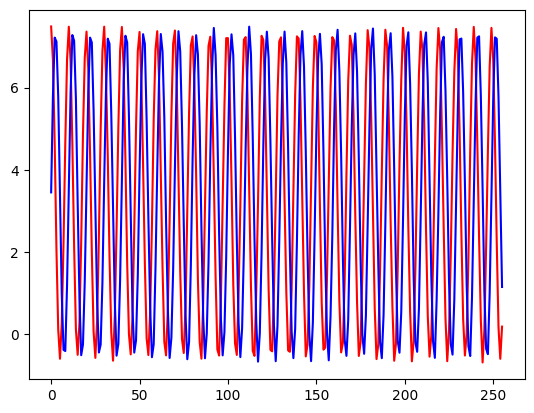

In [159]:
import numpy as np 
import matplotlib.pyplot as plt

fs = 1e3 # adc采样频率
N = 256
N_ = np.linspace(0, N, N) / fs # 

f0 = 100
A = 4
offset = 3.3
I_ = A*np.cos(2*np.pi*f0*N_)+offset + np.random.rand(N) * 0.2
Q_ = A*np.sin(2*np.pi*f0*N_)+offset + np.random.rand(N) * 0.2

plt.figure()
plt.plot(I_,'r')
plt.plot(Q_,'b')

信号直流：3.3943995167020944
信号幅度：898.4375
信号幅度：3.4525706592748078


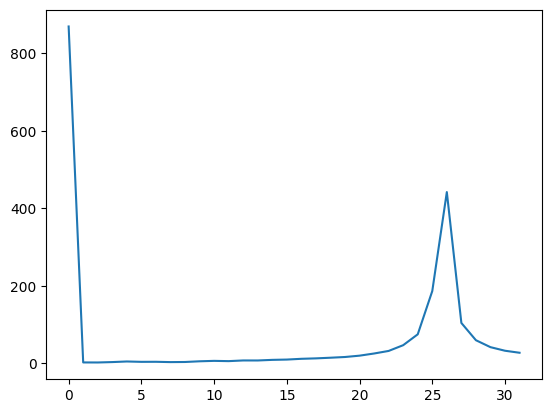

In [160]:
# 执行实数FFT
fft_data = np.abs(np.fft.fft(I_, N))

# 绘制频谱
plt.figure()
plt.plot(fft_data[0:32])

# 计算直流与信号幅度与频率
print(f'信号直流：{fft_data[0]/N}')

idx = np.argmax(fft_data[1:])
print(f'信号幅度：{(idx+1)*fs/N}')
print(f'信号幅度：{np.max(fft_data[idx+1]/(N/2))}')

信号直流：3.4153665653236542
信号幅度：101.5625
信号幅度：3.4316144417266683


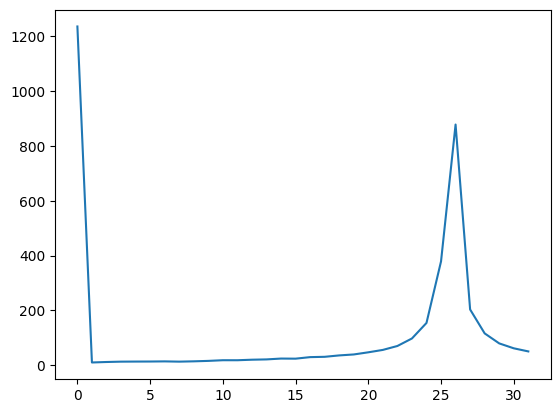

In [161]:
# 执行复数FFT
S = I_+1j*Q_
fft_data = np.abs(np.fft.fft(S, N))

# 绘制频谱
plt.figure()
plt.plot(fft_data[0:32])

# 计算直流与信号幅度与频率
print(f'信号直流：{fft_data[0]/(N*(2**0.5))}')

idx = np.argmax(fft_data[1:])
print(f'信号幅度：{(idx+1)*fs/N}')
print(f'信号幅度：{np.max(fft_data[idx+1]/(N))}')

## 2、频率分辨率

In [162]:
import numpy as np 
import matplotlib.pyplot as plt

fs = 1e4 # adc采样频率
N = 256
N_ = np.linspace(0, N, N) / fs # 

print(f'频率分辨率：{fs/N}')

频率分辨率：39.0625


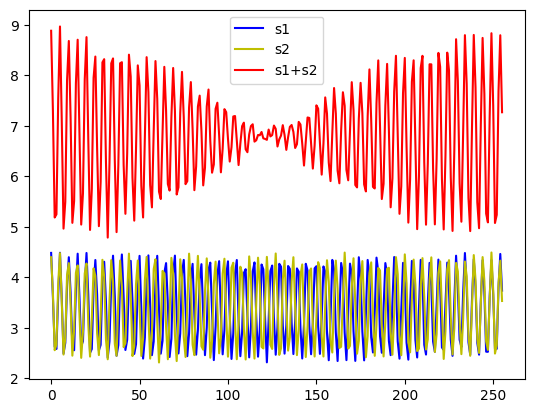

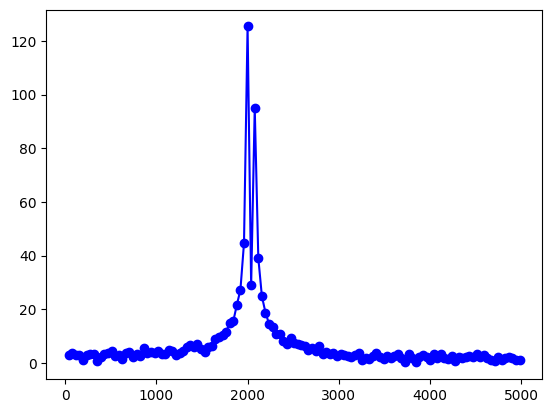

In [163]:
# 两个频率差大于FFT的频率分辨率
f0 = 2e3
f1 = 2.04e3
A = 1
offset = 3.3
s1 = A*np.cos(2*np.pi*f0*N_)+offset + np.random.rand(N) * 0.2
s2 = A*np.cos(2*np.pi*f1*N_)+offset + np.random.rand(N) * 0.2

plt.figure()
plt.plot(s1,'b')
plt.plot(s2,'y')
plt.plot(s1+s2,'r')
plt.legend(['s1','s2','s1+s2'])

fft_data = np.abs(np.fft.fft((s1+s2), N))
plt.figure()
x_aixs = np.linspace(0, N, N) * (fs/N)
plt.plot(x_aixs[1:(int)(N/2)], fft_data[1:(int)(N/2)],'b-o')

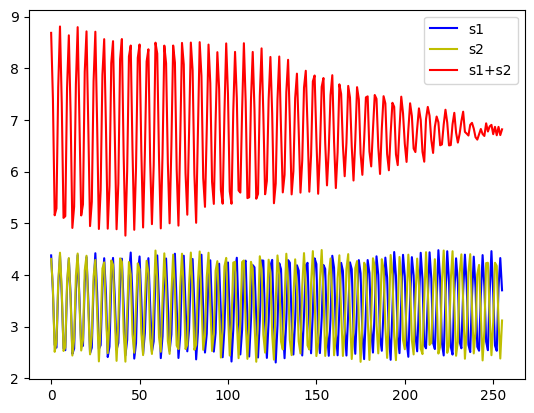

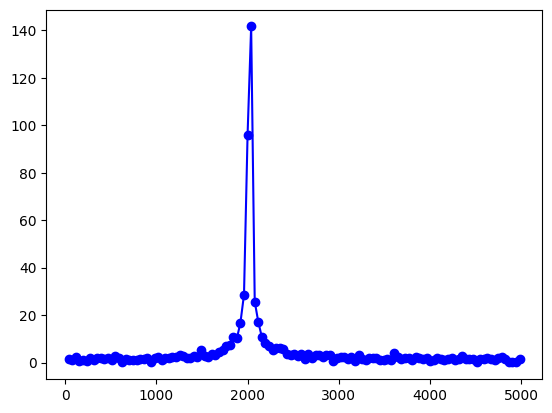

In [164]:
# 两个频率差小于FFT的频率分辨率
f0 = 2e3
f1 = 2.02e3
A = 1
offset = 3.3
s1 = A*np.cos(2*np.pi*f0*N_)+offset + np.random.rand(N) * 0.2
s2 = A*np.cos(2*np.pi*f1*N_)+offset + np.random.rand(N) * 0.2

plt.figure()
plt.plot(s1,'b')
plt.plot(s2,'y')
plt.plot(s1+s2,'r')
plt.legend(['s1','s2','s1+s2'])

fft_data = np.abs(np.fft.fft((s1+s2), N))
plt.figure()
x_aixs = np.linspace(0, N, N) * (fs/N)
plt.plot(x_aixs[1:(int)(N/2)], fft_data[1:(int)(N/2)],'b-o')